In [54]:
import pandas as pd
import numpy as np


In [55]:
df = pd.read_csv('titanic.csv',usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


## Standardization


In [56]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [57]:
# independent and dependent feature
X =df.iloc[:,1:]
Y = df.iloc[:,0]

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.33,random_state=50)

In [59]:
X_train

,Pclass,Age,Fare
100,3,28.0,7.8958
660,1,50.0,133.6500
353,3,25.0,17.8000
540,1,36.0,71.0000
195,1,58.0,146.5208
...,...,...,...
132,3,47.0,14.5000
289,3,22.0,7.7500
109,3,28.0,24.1500
480,3,9.0,46.9000


In [60]:
#command we use is  standardscaler
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()    #model

In [61]:
X_train_scale = scale.fit_transform(X_train)   ## fit

In [62]:
X_train_scale

array([[ 0.85777129, -0.1481151 , -0.50889434],
       [-1.49271923,  1.55733838,  1.91373689],
       [ 0.85777129, -0.38067693, -0.31809177],
       ...,
       [ 0.85777129, -0.1481151 , -0.1957602 ],
       [ 0.85777129, -1.62100674,  0.24251431],
       [ 0.85777129, -0.92332122, -0.51082082]])

we dont use the fit_transform as mean and SD form train is supposed to be same and used here

In [63]:
X_test_scale = scale.transform(X_test)

##further create  the regression models and continue


## MinMax scaler


In [64]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
minmax = MinMaxScaler()
df_minmax = pd.DataFrame(minmax.fit_transform(df),columns = df.columns)

In [66]:
df_minmax.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


## robust Scaler

In [67]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()

In [68]:
df_robust = pd.DataFrame(robust_scaler.fit_transform(df),columns = df.columns)

In [69]:
df_robust

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363
...,...,...,...,...
886,0.0,-1.0,-0.076923,-0.062981
887,1.0,-2.0,-0.692308,0.673281
888,0.0,0.0,0.000000,0.389604
889,1.0,-2.0,-0.153846,0.673281


In [70]:
import seaborn as sns
sns.pairplot(df)

## Gaussian Tranformation

In [71]:
# if you want to check if the value is gaussian
#Q-Q plot
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab

def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

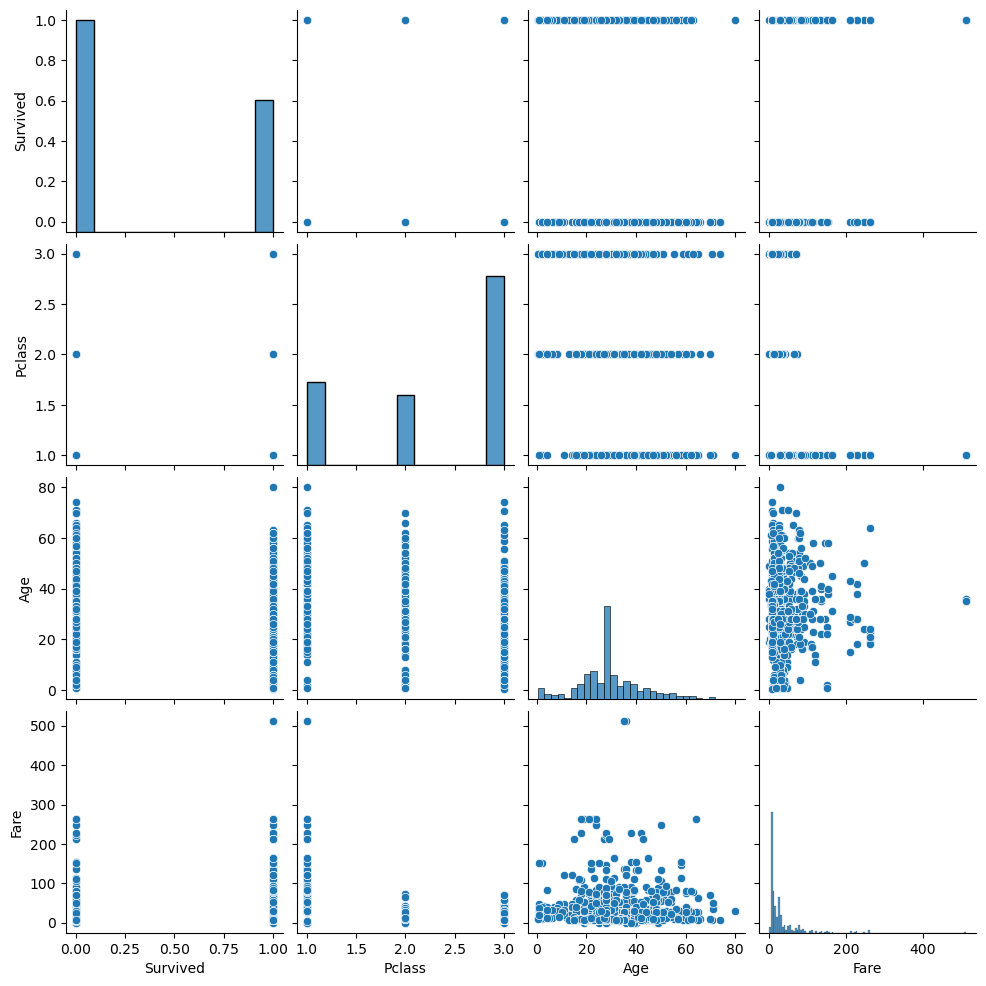

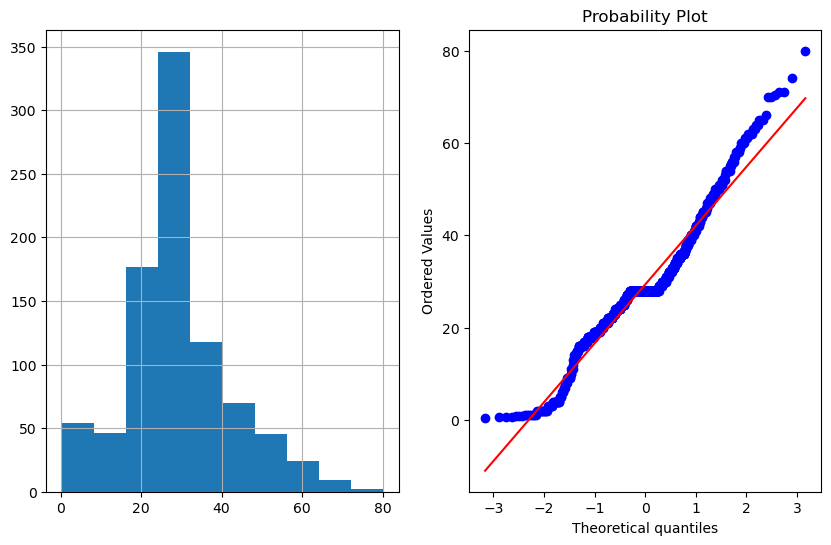

In [72]:
plot_data(df,'Age')
# differnet fetaures different graphs

## reciprocal transformation


In [73]:
df['Age_reciprocal'] = 1/df.Age

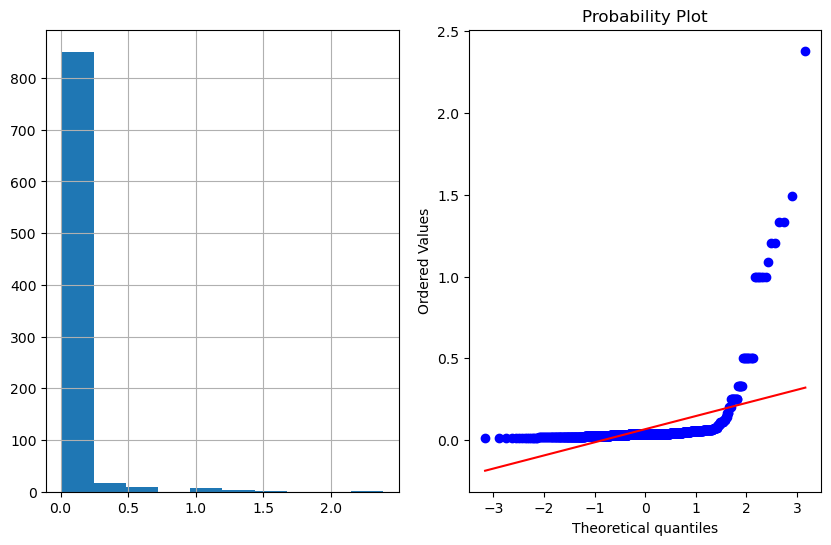

In [74]:
plot_data(df,'Age_reciprocal')

you can perform squareroot etc for tranformation of data

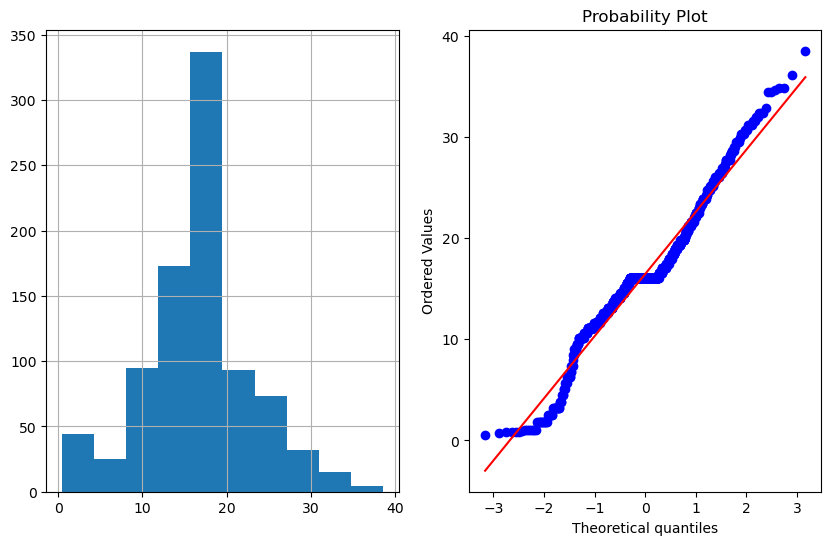

In [76]:
#exponential transformation
df['Age_expo'] = df.Age**(1/1.2)
plot_data(df,'Age_expo')

<== this is closer to normal distribution